## Univariate Stats

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
def import_data(url): # this function imports the data.
    import pandas as pd 
    df = pd.read_csv(url)
    df.drop(columns=["Id"],inplace=True)
    df.dropna(axis=1, inplace=True)
    return df

In [3]:
Filtered_df = import_data(r'C:\\Users\\jayes\\housing_full.csv') # raw data in csv format 

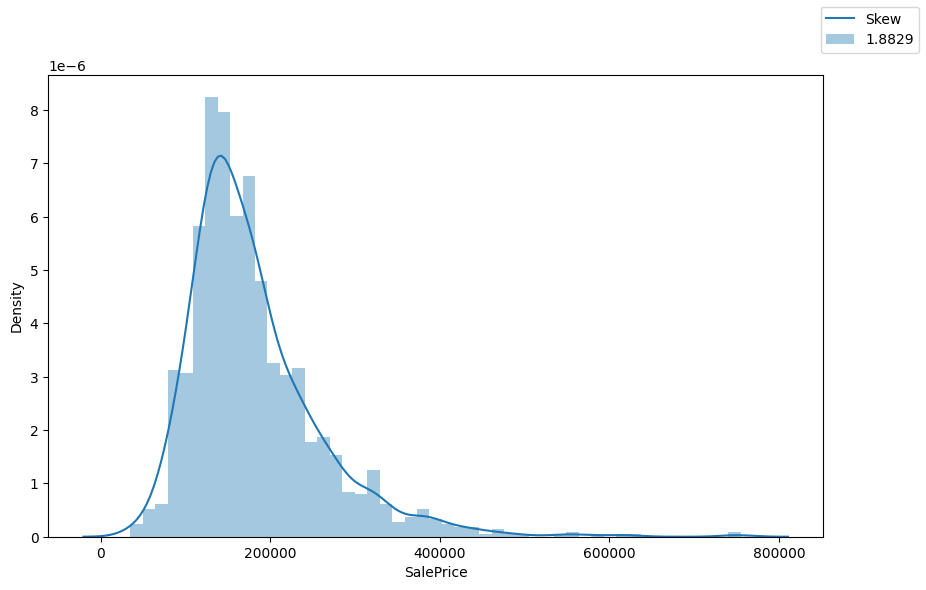

In [4]:
data = Filtered_df['SalePrice']
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
sns.distplot(data)
fig.legend(labels=["Skew",round(Filtered_df['SalePrice'].skew(),4)])
plt.show()

In [5]:
#This functino calculates all the univariate statistics and stores them in a datafrane 

def unistats (Filtered_df): 
    import pandas as pd 
    output_data = pd.DataFrame(columns=["Numeric","Count","Unique","Missing","Dtype","Mean","Mode","Median","STDev","Skew","Kurt"])

    for column in Filtered_df: 
        if pd.api.types.is_numeric_dtype(Filtered_df[column]): # checking if dat type is numerical or string 
            output_data.loc[column]=[pd.api.types.is_numeric_dtype(Filtered_df[column]),Filtered_df[column].count(),
                                     Filtered_df[column].nunique(),
                                     Filtered_df[column].isnull().sum(),Filtered_df[column].dtype,Filtered_df[column].mean(),
                                     Filtered_df[column].mode().values[0],Filtered_df[column].median(),
                                     Filtered_df[column].std(),Filtered_df[column].skew(),Filtered_df[column].kurt()]
        else:
            output_data.loc[column]=[pd.api.types.is_numeric_dtype(Filtered_df[column]),Filtered_df[column].count(),
                                     Filtered_df[column].nunique(),Filtered_df[column].isnull().sum(),
                                     Filtered_df[column].dtype,
                                 "-","-","-","-","-","-"]
    return output_data.sort_values(by=["Numeric","Skew","Unique"], ascending = False)


In [6]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
unistats(Filtered_df)

,Numeric,Count,Unique,Missing,Dtype,Mean,Mode,Median,STDev,Skew,Kurt
MiscVal,True,1460,21,0,int64,43.489041,0,0.0,496.123024,24.476794,701.003342
PoolArea,True,1460,8,0,int64,2.758904,0,0.0,40.177307,14.828374,223.268499
LotArea,True,1460,1073,0,int64,10516.828082,7200,9478.5,9981.264932,12.207688,203.243271
3SsnPorch,True,1460,20,0,int64,3.409589,0,0.0,29.317331,10.304342,123.662379
LowQualFinSF,True,1460,24,0,int64,5.844521,0,0.0,48.623081,9.011341,83.234817
KitchenAbvGr,True,1460,4,0,int64,1.046575,1,1.0,0.220338,4.488397,21.532404
BsmtFinSF2,True,1460,144,0,int64,46.549315,0,0.0,161.319273,4.255261,20.113338
ScreenPorch,True,1460,76,0,int64,15.060959,0,0.0,55.757415,4.122214,18.439068
BsmtHalfBath,True,1460,3,0,int64,0.057534,0,0.0,0.238753,4.103403,16.396642
EnclosedPorch,True,1460,120,0,int64,21.95411,0,0.0,61.119149,3.089872,10.430766


In [7]:
unistats(Filtered_df).to_csv(r'E:\\Mystuff\\Jayesh Deshmukh\\Portfolio_Projects\\Python\\Web_scraping\\univariate.csv',index=True, header=True) # stroung data in new csv file 

## Bivariate Stats


In [8]:
Filtered_df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,TotalSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [9]:
def anova(Filtered_df, feature, label):
    from scipy import stats
    import numpy as np
    import pandas as pd
    groups = Filtered_df[feature].unique()
    Filtered_df.grouped =Filtered_df.groupby(feature)
    group_label = []
    
    for g in groups:
        g_list = Filtered_df.grouped.get_group(g)
        group_label.append(g_list[label])
    return stats.f_oneway(*group_label)

In [10]:
def Bivariate_stats(Filtered_df,label):
    from scipy import stats
    import numpy as np
    import pandas as pd 
    import warnings 
    warnings.filterwarnings('ignore')
    
    output_dataframe = pd.DataFrame(columns=["Stat","+/-","Efffect size","p-Value"])

    for column in Filtered_df:
        if column!=label: # eliminating column name mentioned in function 
            if Filtered_df[column].isnull().sum()==0: # eliminating null values 
                if pd.api.types.is_numeric_dtype(Filtered_df[column]): #only look for numeric columns from dataframe
                    r,p = stats.pearsonr(Filtered_df[label],Filtered_df[column]) #assuming that data is normally distributed, By default comparing with sales data 
                    output_dataframe.loc[column] = ['r',np.sign(r),abs(round(r,3)),round(p,6)]
                else:
                    f,p = anova(Filtered_df[[column,label]],column,label)
                    output_dataframe.loc[column] = ['f','',round(f,3),round(p,6)]
            else:
                 output_dataframe.loc[column] = [np.nan,np.nan,np.nan,np.nan]
   
    return output_dataframe.sort_values(by=['Stat','Efffect size'],ascending =[False,False])


In [11]:
Bivariate_stats(Filtered_df,'SalePrice') # the output shows relation between SalePrice and other columns 

,Stat,+/-,Efffect size,p-Value
OverallQual,r,1.0,0.791,0.000000
TotalSF,r,1.0,0.709,0.000000
GarageCars,r,1.0,0.640,0.000000
GarageArea,r,1.0,0.623,0.000000
TotalBsmtSF,r,1.0,0.614,0.000000
1stFlrSF,r,1.0,0.606,0.000000
FullBath,r,1.0,0.561,0.000000
TotRmsAbvGrd,r,1.0,0.534,0.000000
YearBuilt,r,1.0,0.523,0.000000
YearRemodAdd,r,1.0,0.507,0.000000


## Visualizations 

In [12]:
def scat_hist(dfrm,a,b): # this function creates a jointplot to demonstrate corelation between two variables 
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy import stats 

    sns.set_theme(style='darkgrid', palette='deep',color_codes=True)
    sns.jointplot(data=dfrm,x=a,y=b,kind="reg",height=10)
    plt.xlabel(a, fontsize=10)
    plt.ylabel(b, fontsize=10)
    plt.tick_params(axis="both", labelsize=10)
    plt.show()

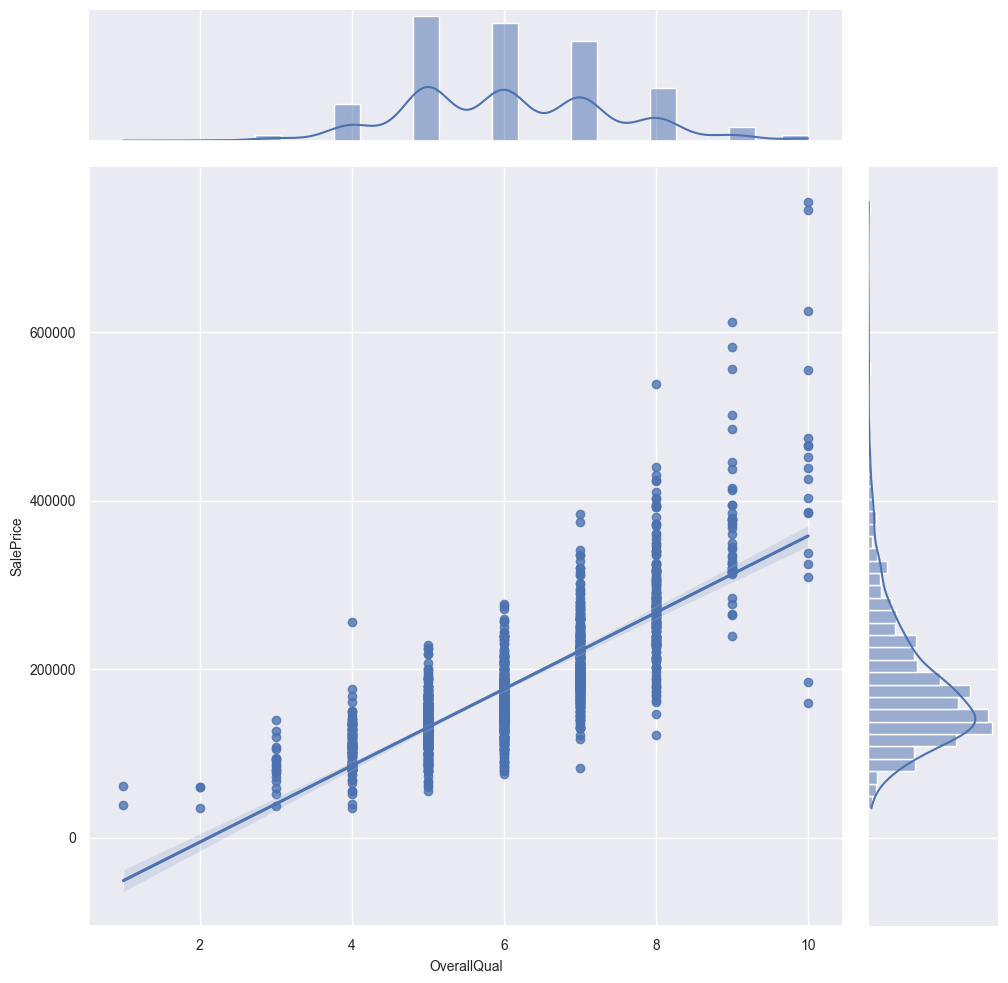

In [13]:
scat_hist(Filtered_df,'OverallQual','SalePrice') # output shows corelation between Overall quality score and sales price 

In [14]:
# As it is seen in the above graph , there is positive corelation between overall quality score and price of a house 

In [15]:
pd.options.display.float_format = '{:.5f}'.format
Bivariate_stats(Filtered_df,"SalePrice")

,Stat,+/-,Efffect size,p-Value
OverallQual,r,1.00000,0.79100,0.00000
TotalSF,r,1.00000,0.70900,0.00000
GarageCars,r,1.00000,0.64000,0.00000
GarageArea,r,1.00000,0.62300,0.00000
TotalBsmtSF,r,1.00000,0.61400,0.00000
1stFlrSF,r,1.00000,0.60600,0.00000
FullBath,r,1.00000,0.56100,0.00000
TotRmsAbvGrd,r,1.00000,0.53400,0.00000
YearBuilt,r,1.00000,0.52300,0.00000
YearRemodAdd,r,1.00000,0.50700,0.00000


In [16]:
NeededColumns = pd.DataFrame(Filtered_df[['Neighborhood', 'BldgType', 'HouseStyle','OverallQual','OverallCond',
                                          'YearBuilt','KitchenAbvGr','GarageCars','GarageArea','TotRmsAbvGrd']])

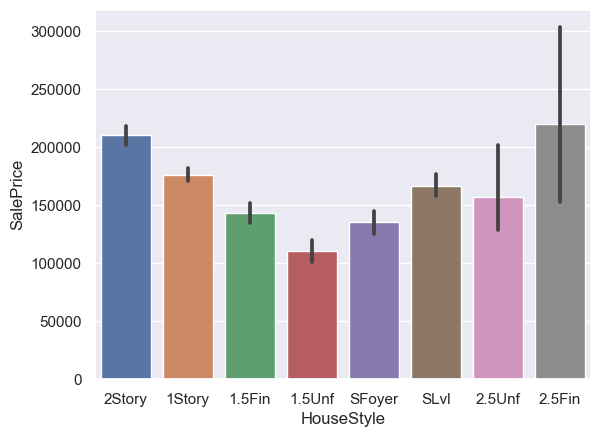

In [17]:
sns.barplot(x=Filtered_df['HouseStyle'], y=Filtered_df['SalePrice'])
plt.show()

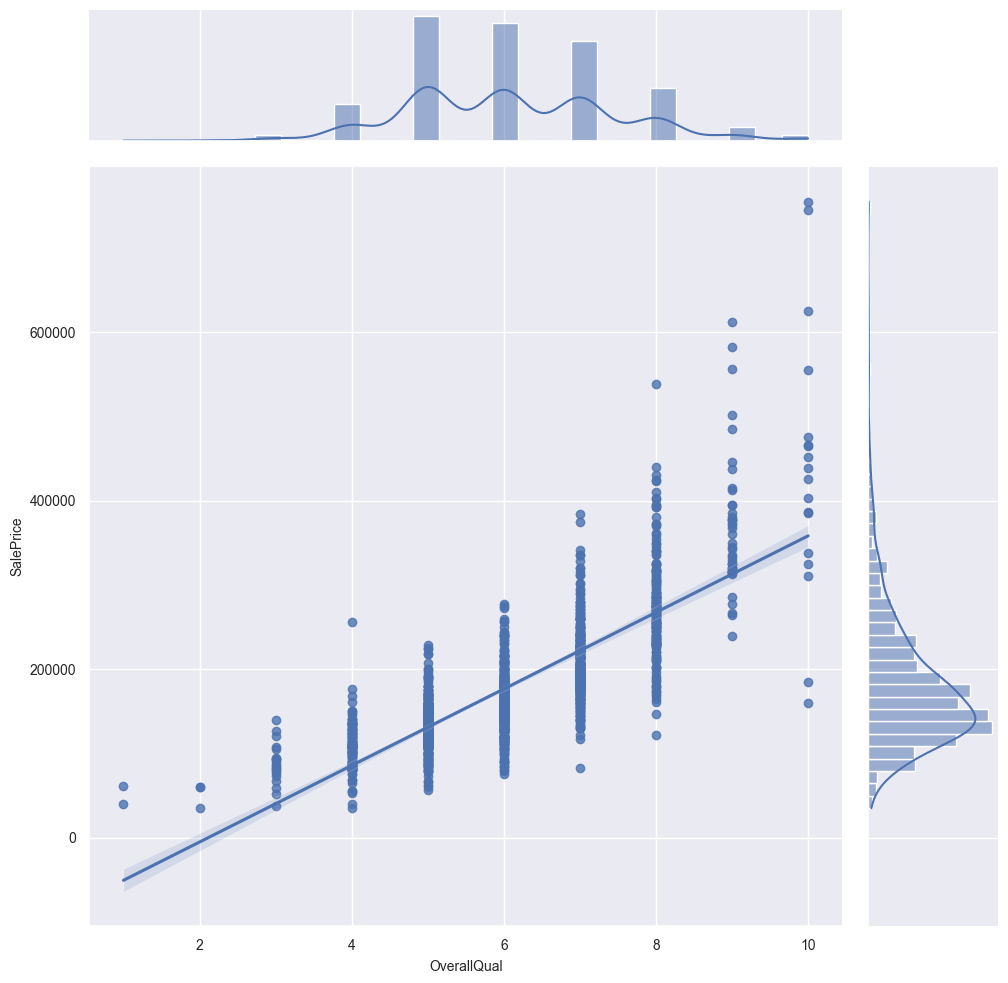

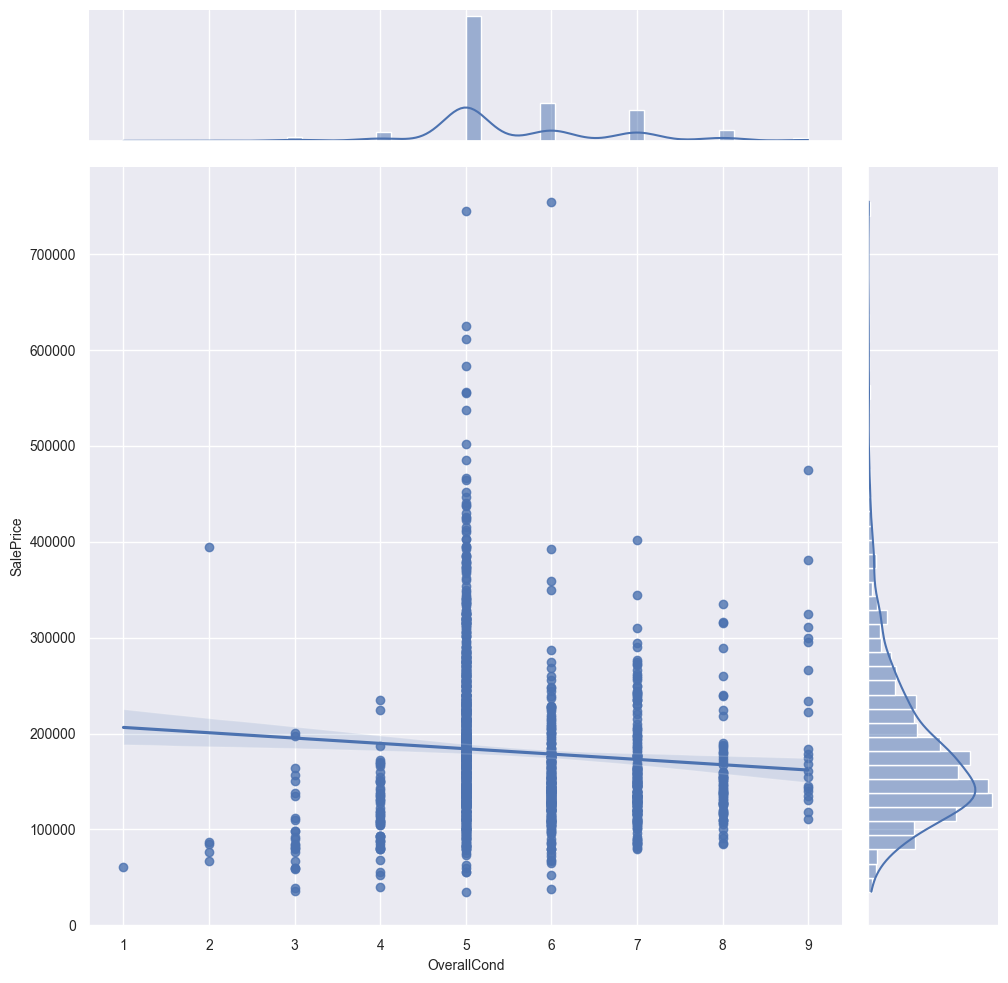

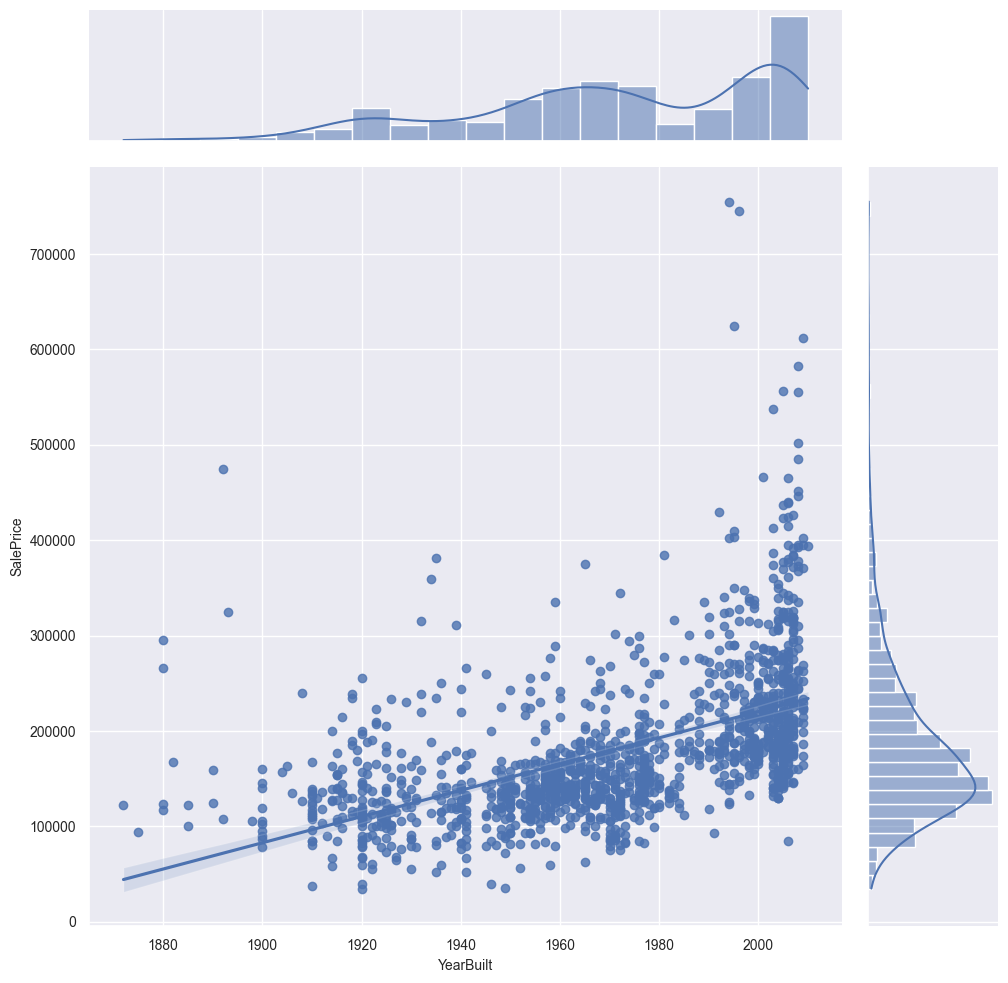

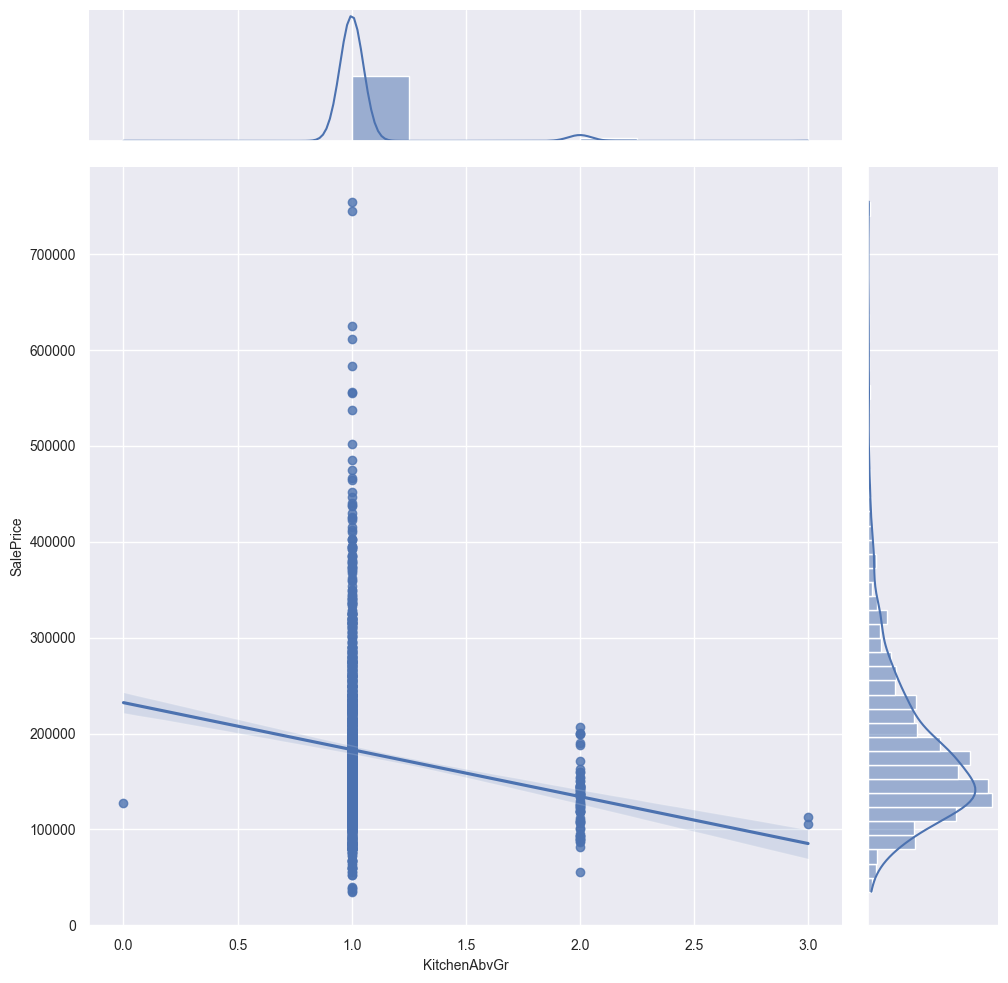

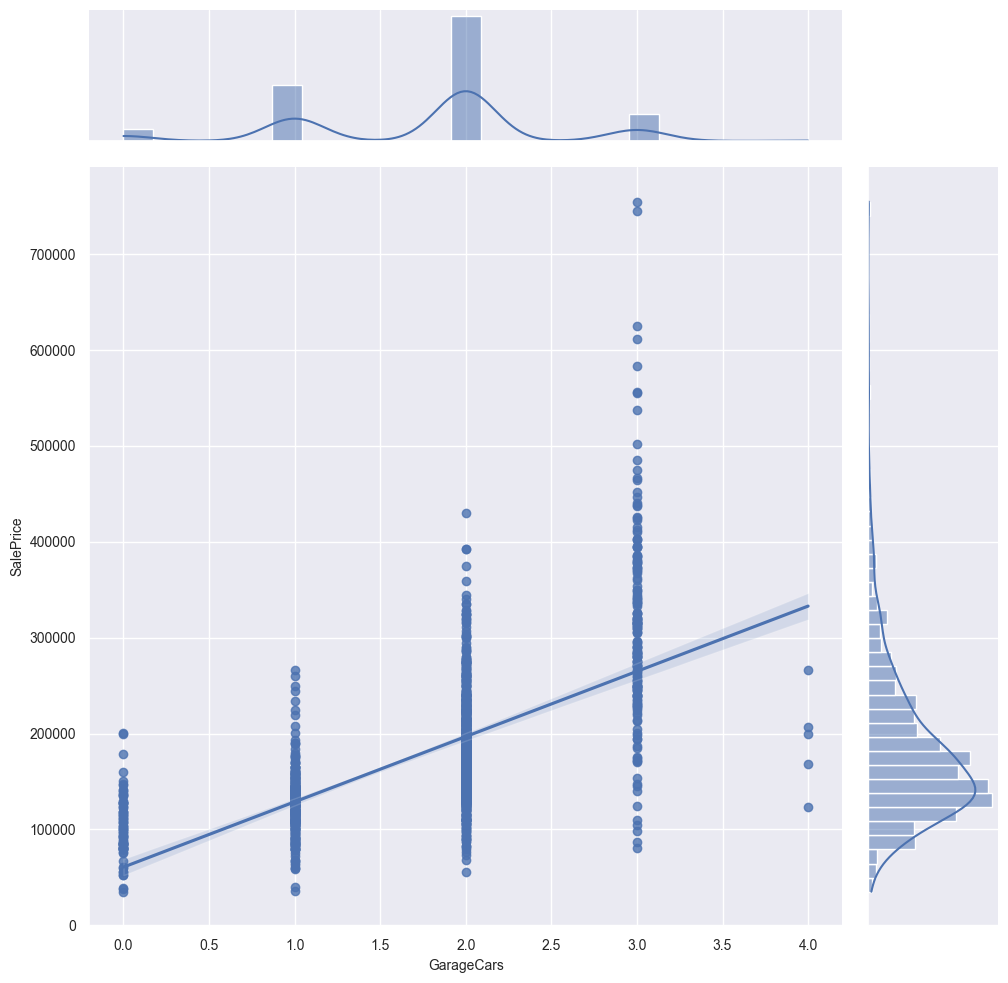

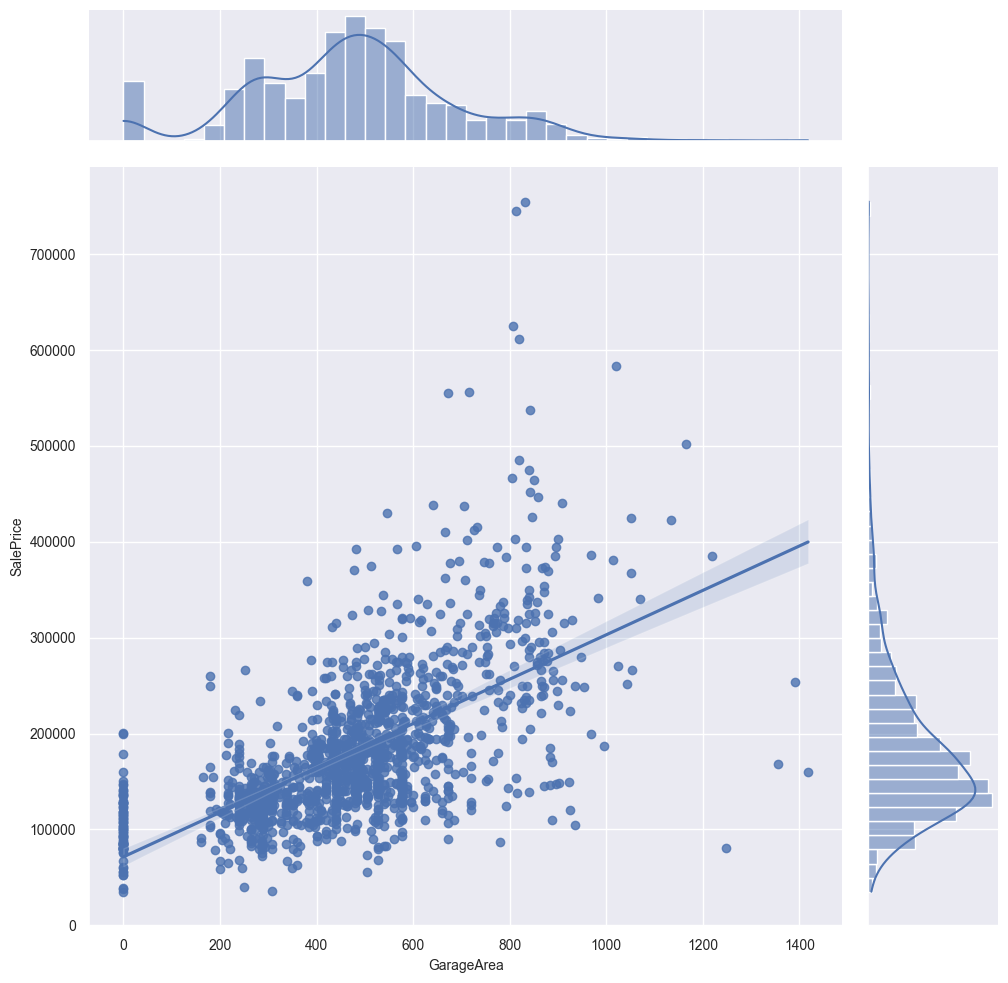

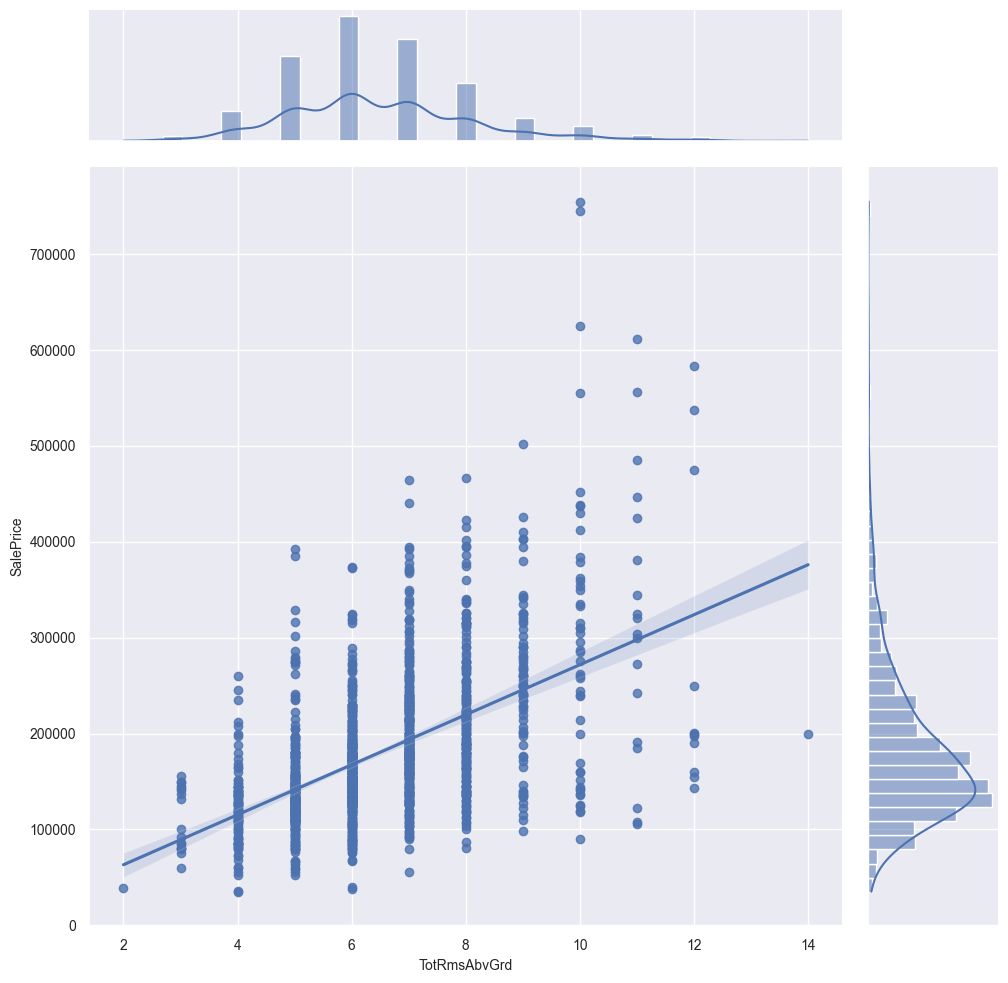

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
for columnName in NeededColumns:
    if pd.api.types.is_numeric_dtype(NeededColumns[columnName]):
        scat_hist(Filtered_df,columnName,'SalePrice')       